### This notebook contains 1000 English article where each one has 50 character as a maximum length of words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator

%matplotlib inline
dataset = pd.read_csv('data/dataset.csv', sep='\t', header=None).applymap(str)
languages = dataset[dataset.columns[0]].unique()
categories = dataset[dataset.columns[1]].unique()
# Rename Dataset Columns
dataset.columns = ["language","label","text"]
dataset.head()
languagesData=[]
loc = 0
for i in languages:
    name = languages[loc]+"Data" 
    globals()[name] = pd.DataFrame( dataset[dataset.language == i])
    loc += 1
    
englishData = englishData[1:1000]

In [2]:
def lower_words(text):
    text = text.str.lower()
    return text

englishData['text'] = lower_words(englishData['text'])
input_str = englishData['text']
print(englishData.head())

import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
def remove_surl(text):
    text = text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    return text

def remove_url(text):
    text = text.apply(lambda x: re.split('http:\/\/.*', str(x))[0])
    return text

englishData['text'] = remove_url(englishData['text'])
englishData['text'] = remove_surl(englishData['text'])

englishData.head()
def remove_numbers(text):
    text = text.str.replace('\d+', '')
    return text


englishData['text'] = remove_numbers(englishData['text'])
englishData.head()
def remove_punctuations(text):
    text = text.str.replace('[^\w\s]','')
    return text


englishData['text'] = remove_punctuations(englishData['text'])
englishData.head()

def remove_blank_space(col):
    col = col.str.strip()
    col = col.replace('\s+', ' ', regex=True)   
    return col


englishData['text'] = remove_blank_space(englishData.text)
englishData.head()
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
def remove_stop_words(text, stop):    
    text.apply(lambda x: [item for item in x if item not in stop])
    return text

stop = stopwords.words('english')
remove_stop_words(englishData['text'],stop)
englishData.head()



  language        label                                               text
1  english  advertising  trump asks sec to mull half-year corporate fil...
2  english  advertising  wall st. up on trade hopes, s&p equals longest...
3  english  advertising  asian shares hit one-year low on turkey, china...
4  english  advertising  asian stocks weaken as turkey worries weigh, d...
5  english  advertising  most asian shares edge up after wall st. gains...


Using TensorFlow backend.


,language,label,text
1,english,advertising,trump asks sec to mull halfyear corporate fili...
2,english,advertising,wall st up on trade hopes sp equals longest bu...
3,english,advertising,asian shares hit oneyear low on turkey china w...
4,english,advertising,asian stocks weaken as turkey worries weigh do...
5,english,advertising,most asian shares edge up after wall st gains ...


In [3]:
df = pd.DataFrame(englishData["label"]) 
# pd.DataFrame(data=englishData["text"][1:10])
df["text"] = englishData['text'].str.split().str[1:100].str.join(" ")
translator = Translator()

mylist = list( df["text"])
df["Arabic"] = df.text.map(lambda x: translator.translate(x,  dest="ar").text)

In [4]:
df.head()

,label,text,Arabic
1,advertising,asks sec to mull halfyear corporate filings vs...,يسأل ثانية للنظر في طلبات الشركات نصف السنة مق...
2,advertising,st up on trade hopes sp equals longest bull ru...,التباطؤ في الآمال التجارية: sp تساوي أطول فترة...
3,advertising,shares hit oneyear low on turkey china worries...,الأسهم الصينية تتراجع إلى أدنى مستوياتها مع ال...
4,advertising,stocks weaken as turkey worries weigh dollar s...,الأسهم الأسيوية تضعف مع قلق تركيا من ارتفاع ال...
5,advertising,asian shares edge up after wall st gains but c...,الأسهم الأسيوية ترتفع بعد المكاسب التي حققتها ...


In [5]:
df.to_csv("mydatasetWitharabicText.csv")

In [6]:
df["NewEnglish"] = df.Arabic.map(lambda x: translator.translate(x,  dest="en").text)

In [7]:
df.to_csv("mydatasetWitharabicEnglishText.csv")

In [8]:
df.head()

,label,text,Arabic,NewEnglish
1,advertising,asks sec to mull halfyear corporate filings vs...,يسأل ثانية للنظر في طلبات الشركات نصف السنة مق...,Asked again to look at half-year corporate req...
2,advertising,st up on trade hopes sp equals longest bull ru...,التباطؤ في الآمال التجارية: sp تساوي أطول فترة...,Deceleration in business hopes: sp equals the ...
3,advertising,shares hit oneyear low on turkey china worries...,الأسهم الصينية تتراجع إلى أدنى مستوياتها مع ال...,Chinese stocks fall to their lowest levels wit...
4,advertising,stocks weaken as turkey worries weigh dollar s...,الأسهم الأسيوية تضعف مع قلق تركيا من ارتفاع ال...,Asian stocks weaken as Turkey worries about do...
5,advertising,asian shares edge up after wall st gains but c...,الأسهم الأسيوية ترتفع بعد المكاسب التي حققتها ...,"Asian stocks rise after Wall Street gains, but..."


In [9]:
from keras.layers import GRU,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, GRU,Dropout,BatchNormalization,RepeatVector,Permute


def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [10]:
X = df.text
Y = df.label
encoder = LabelEncoder()
encoder.fit(Y)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
   X, Y, test_size=0.25, random_state=1000)



In [11]:
def myfunc(Xtrain,Ytrain,Xtest,Ytest,shape):
    Ytrain = encoder.transform(Ytrain)
    # convert integers to dummy variables (i.e. one hot encoded)
    Ytrain = np_utils.to_categorical(Ytrain)

    Ytest = encoder.transform(Ytest)
    # convert integers to dummy variables (i.e. one hot encoded)
    Ytest = np_utils.to_categorical(Ytest)


    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(Xtrain)

    Xtrain = tokenizer.texts_to_sequences(Xtrain)
    Xtest = tokenizer.texts_to_sequences(Xtest)

    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

    maxlen = 100

    Xtrain = pad_sequences(Xtrain, padding='post', maxlen=maxlen)
    Xtest = pad_sequences(Xtest, padding='post', maxlen=maxlen)

    def create_embedding_matrix(filepath, word_index, embedding_dim):
    	vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    	embedding_matrix = np.zeros((vocab_size, embedding_dim))
    	with open(filepath) as f:
    		for line in f:
    		    word, *vector = line.split()
    		    if word in word_index:
    		        idx = word_index[word] 
    		        embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    	return embedding_matrix

    embedding_dim = 50
    embedding_matrix = create_embedding_matrix(
        'data/glove.6B.50d.txt',
        tokenizer.word_index, embedding_dim)
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, 
    	                   weights=[embedding_matrix], 
    	                   input_length=maxlen, 
    	                   trainable=True))
    model.add(GRU(256, return_sequences=True))
    model.add(Dense(256, activation='tanh'))
    model.add(GRU( 256, return_sequences=False))


    # model.add(Dropout(0.2))
    model.add(layers.Dense(shape, activation='sigmoid'))
    model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    model.summary()


    history = model.fit(Xtrain, Ytrain,
            epochs=20,
            verbose=True,
            validation_data=(Xtest, Ytest))
    loss, accuracy = model.evaluate(Xtrain, Ytrain, verbose=True)
    print("Training Accuracy: {:.4f}".format(accuracy))
    loss, accuracy = model.evaluate(Xtest, Ytest, verbose=True)
    print("Testing Accuracy:  {:.4f}".format(accuracy))
    plot_history(history)
    return model



In [14]:
len(Ytrain)

749

### The dataset without the concatenation of the  translated rows 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           603150    
_________________________________________________________________
gru_3 (GRU)                  (None, 100, 256)          235776    
_________________________________________________________________
dense_3 (Dense)              (None, 100, 256)          65792     
_________________________________________________________________
gru_4 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dense_4 (Dense)              (None, 11)                2827      
Total params: 1,301,529
Trainable params: 1,301,529
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 749 samples, validate on 250 samples
Epoch 1/20
749/749 [==================

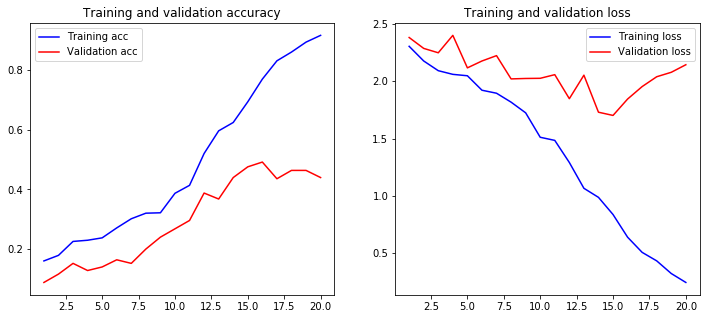

In [16]:
myfunc(Xtrain,Ytrain,Xtest,Ytest,11)

In [17]:
frames = [Xtrain, df.text]
Xtrain = pd.concat(frames)

In [18]:
frames = [Ytrain, df.label]
Ytrain = pd.concat(frames)


In [19]:
len(Ytrain)

1748

### The concatenated Dataframe of the original English text and the translated text


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           726350    
_________________________________________________________________
gru_7 (GRU)                  (None, 100, 256)          235776    
_________________________________________________________________
dense_7 (Dense)              (None, 100, 256)          65792     
_________________________________________________________________
gru_8 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dense_8 (Dense)              (None, 11)                2827      
Total params: 1,424,729
Trainable params: 1,424,729
Non-trainable params: 0
_________________________________________________________________
Train on 1748 samples, validate on 250 samples
Epoch 1/20
1748/1748 [==============================] - 25s 14ms/step - loss: 2.2397 

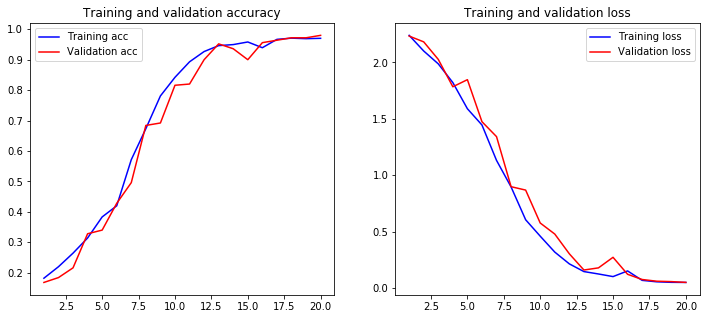

In [21]:
myfunc(Xtrain,Ytrain,Xtest,Ytest,11)


<b><i> Conclusion: 

The Experiment result after the round trip translation is: 
    
Training Accuracy: 0.9731

Testing Accuracy:  0.9800
    
The Model Results without using the translation is:

Training Accuracy: 0.9533

Testing Accuracy:  0.4400 <b> <i>